## Введение: 

## Главный вопрос: 
- В каком городе лучше покупать квартиру?
  
## Задачи: 

- Проанализировать рынок квартир в приведенном датасете по городам
- Посмотреть корреляцию признаков 
- Сделать вывод о замечанных закономерностях 

## Шаги: 

- Проверить качество датасета (null значения, аномальные значения, ошибки в значениях)
- Посмотреть распределение признаков между друг другом (как одно влияет на другое)
- Составить матрицу корреляции
- Посмотреть распределение признаков

## Первичная информация о датасете: 

- house_type - город / район (поле должно быть строкой)
- locality - местоположение (тоже должно быть строкой)
- city - город (должен быть строкой)
- area - площадь квартиры в фунтах(float значение)
- beds - количество кроватей в квартире (integer)
- bathrooms - количество ванн (integer)
- furnishing - качество квартиры (Semi-furnished - немного мебилированая, мебилированая на половину, Furnished - полностью мебилированая, Unfurnished -   в квартире вообще нету мебили)
- area_rate - цена за 1 квадратный метр (в Индии используют для вычислений и квадратный метр и фунт)
- rent - аренда в рупиях

## Импортируем библиотеки: 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [3]:
df = pd.read_csv('flats_india_rent.csv', on_bad_lines='skip', sep=',')

df.head(10)

,,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
2 BHK Flat for Rent in Oberoi Woods,Goregaon East,Mumbai,Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.000000,120000.0
1 BHK Flat for Rent in Sapphire Lakeside,Powai,Mumbai,Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.000000,40000.0
1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1.0,0,Unfurnished,22.0,12000.0,NaN,NaN
2 BHK Flat for Rent in Hingna,Nagpur,Hingna,Nagpur,1000.0,2.0,2,0,Unfurnished,8.0,8000.000000,NaN
1 BHK Flat for Rent in Unique Star Harsh Vihar,Mira Road Area,Mumbai,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.000000,15000.0
1 BHK House for Rent in Jakkur Bangalore,Jakkur,Bangalore,600.0,1,1.0,0,Unfurnished,27.0,16000.0,NaN,NaN
3 BHK Flat for Rent in Chittaranjan Park,New Delhi,Chittaranjan Park,New Delhi,1260.0,3.0,3,2,Unfurnished,47.66666666666666,60000.000000,NaN
3 BHK Flat for Rent in Soami Nagar South,Soami Nagar,New Delhi,Soami Nagar South,New Delhi,2700.0,3,3,2,Semi-Furnished,74.111111,200000.0
1 BHK House for Rent in Hadapsar Pune,Hadapsar,Pune,650.0,1,1.0,0,Unfurnished,17.0,11000.0,NaN,NaN
1 BHK Flat for Rent in Riverdale Suites,Kharadi,Pune,Kharadi,Pune,495.0,1,1,0,Unfurnished,48.000000,24000.0


In [4]:
df.info() # видно, чир есит null значения в некоторых колонках

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7475 entries, ('2 BHK Flat for Rent in Oberoi Woods', ' Goregaon East') to ('2 BHK Flat for Rent in Govindpura', ' Dooravani Nagar')
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7475 non-null   object 
 1   locality    7475 non-null   object 
 2   city        7475 non-null   object 
 3   area        7475 non-null   float64
 4   beds        7475 non-null   int64  
 5   bathrooms   7475 non-null   object 
 6   balconies   7475 non-null   object 
 7   furnishing  7475 non-null   object 
 8   area_rate   5923 non-null   float64
 9   rent        2678 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 859.9+ KB


house_type object
locality object
city object
area float64
beds int64
bathrooms object
balconies object
furnishing object
area_rate float64
rent float64

house_type object
locality object
city object
area float64
beds int64
bathrooms object
balconies object
furnishing object
area_rate float64
rent float64

In [5]:
df.describe() # значения на первый взгляд нормальные 

,area,beds,area_rate,rent
count,7475.000000,7475.000000,5.923000e+03,2.678000e+03
mean,390.683478,1.832910,2.693007e+04,7.109366e+04
std,682.865337,1.205992,5.829064e+04,1.223333e+05
min,0.000000,0.000000,2.000000e+00,3.500000e+03
25%,2.000000,1.000000,4.500000e+01,2.300000e+04
50%,3.000000,2.000000,9.500000e+03,3.850000e+04
75%,737.500000,3.000000,3.000000e+04,7.500000e+04
max,13500.000000,10.000000,1.450000e+06,2.700000e+06


In [27]:
df.bathrooms.unique() # количество ванн тоже нормальное 

array(['2', '1', '3', '5', '6', '4', '0', '8', '7'], dtype=object)

In [6]:
df[df['city'].isin(['Mumbai', 'New Delhi', 'Pune', 'Nagpur', 'Bangalore'])] # отбираем только строки, а не числа

,,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
2 BHK Flat for Rent in Oberoi Woods,Goregaon East,Mumbai,Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.000000,120000.0
1 BHK Flat for Rent in Sapphire Lakeside,Powai,Mumbai,Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.000000,40000.0
1 BHK Flat for Rent in Unique Star Harsh Vihar,Mira Road Area,Mumbai,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.000000,15000.0
3 BHK Flat for Rent in Soami Nagar South,Soami Nagar,New Delhi,Soami Nagar South,New Delhi,2700.0,3,3,2,Semi-Furnished,74.111111,200000.0
1 BHK Flat for Rent in Riverdale Suites,Kharadi,Pune,Kharadi,Pune,495.0,1,1,0,Unfurnished,48.000000,24000.0
...,...,...,...,...,...,...,...,...,...,...,...
4 BHK Flat for Rent in Oberoi Eternia And Enigma,Mulund West,Mumbai,Mulund West,Mumbai,1926.0,4,3,0,Semi-Furnished,75.000000,150000.0
1 BHK Flat for Rent in Link View,IC Colony,Mumbai,IC Colony,Mumbai,430.0,1,1,0,Semi-Furnished,70.000000,30000.0
2 BHK Flat for Rent in Lodha Fiorenza,Goregaon East,Mumbai,Goregaon East,Mumbai,870.0,2,2,2,Furnished,144.000000,130000.0
2 BHK Flat for Rent in Malpani Vivanta,Balewadi,Pune,Balewadi,Pune,734.0,2,2,2,Unfurnished,48.000000,35000.0


In [7]:
df = df.dropna() # удаляем null значения

In [8]:
num_duplicates = df.duplicated().sum() # выводим количество дубликатов 
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 1


In [9]:
df = df.drop_duplicates() # удаляем дубликаты

In [10]:
list(df.city.unique())

['Mumbai', 'New Delhi', 'Pune', 'Nagpur', 'Bangalore']

In [11]:
df = df[df['area'] > 225] # не учитываем жилье меньше 225 футов в квадрате оно не пригодное для жизни 

## Посмотрим сначала распредление по очевидным признакам

### 1) Распределение городов по количеству объектов

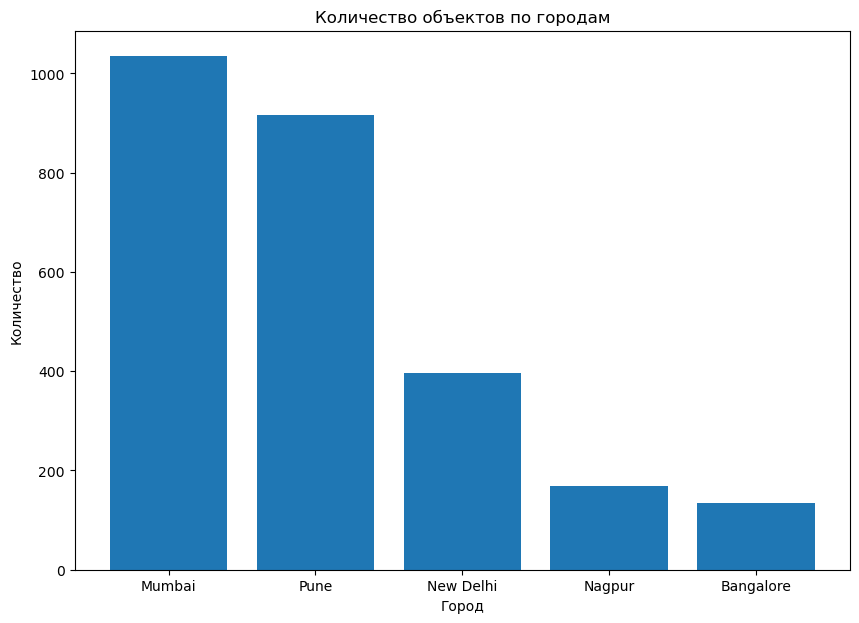

In [12]:
cities_to_show = ['Mumbai', 'New Delhi', 'Pune', 'Nagpur', 'Bangalore']
filtered_df = df[df['city'].isin(cities_to_show)]

plt.figure(figsize=(10, 7))

city_counts = filtered_df['city'].value_counts()

plt.bar(city_counts.index, city_counts.values)
plt.title('Количество объектов по городам')
plt.xlabel('Город')
plt.ylabel('Количество')

plt.show()

### Вывод по количеству квартир по городам: 

Видим, что Mumbai - самый большой город по кол-ву объектов, а Bangalore - самый маленький

### 2) Средняя цена аренды по городам

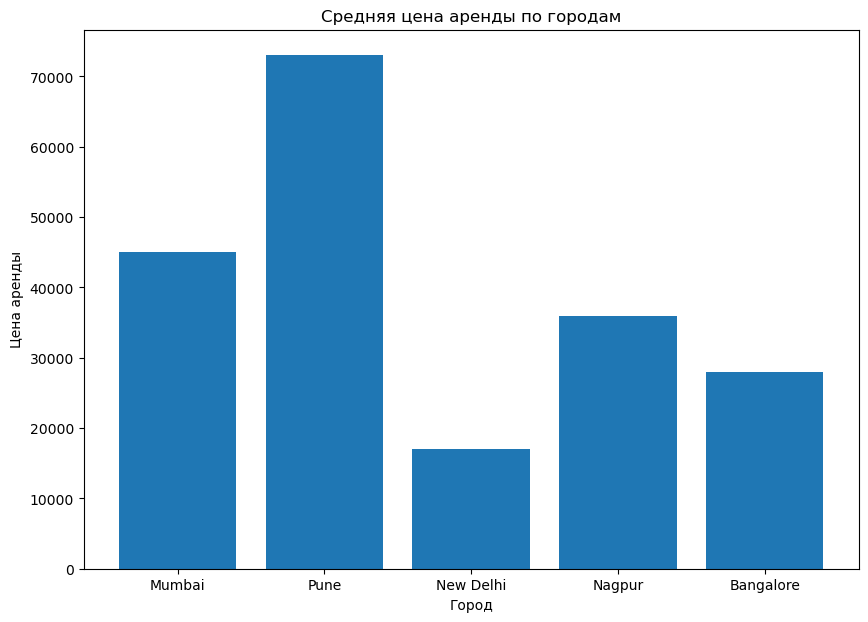

In [13]:
plt.figure(figsize=(10, 7))

city_counts = filtered_df['city'].value_counts()

median_rent_by_city = filtered_df.groupby('city')['rent'].median()

plt.bar(city_counts.index, median_rent_by_city)
plt.title('Средняя цена аренды по городам')
plt.xlabel('Город')
plt.ylabel('Цена аренды')

plt.show()

### Вывод по средним ценам квартир по городам: 

В Pune самая дорогая аренда среди других городов, а в New Delhi самая дешевая.

### Распределение площади квартир по городам 

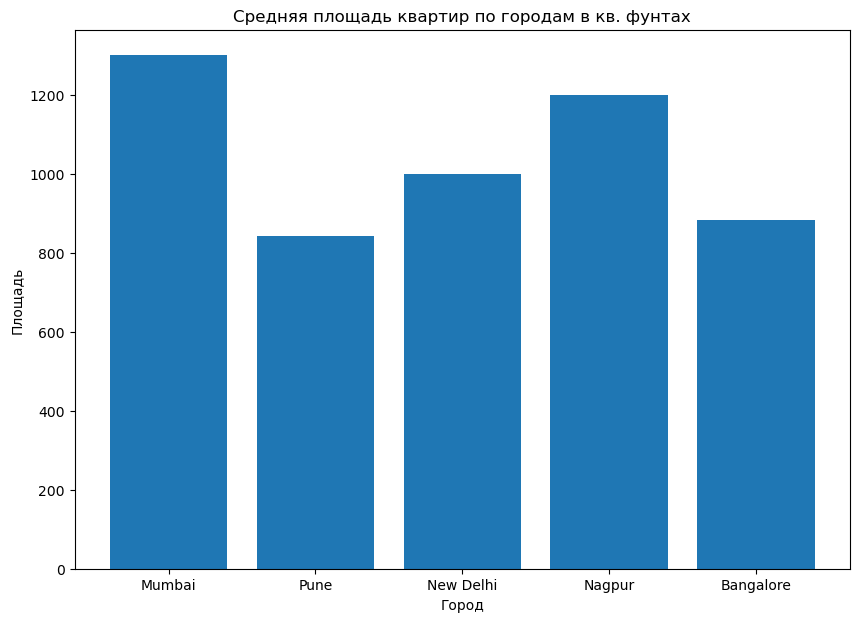

In [14]:
plt.figure(figsize=(10, 7))

city_counts = filtered_df['city'].value_counts()

median_rent_by_city = filtered_df.groupby('city')['area'].median()

plt.bar(city_counts.index, median_rent_by_city)
plt.title('Средняя площадь квартир по городам в кв. фунтах')
plt.xlabel('Город')
plt.ylabel('Площадь')

plt.show()

### Вывод о средней площади квартир по городам 

В Мумбаи средняя площадь квартиры больше чем у других городов, у Pune самая маленькая

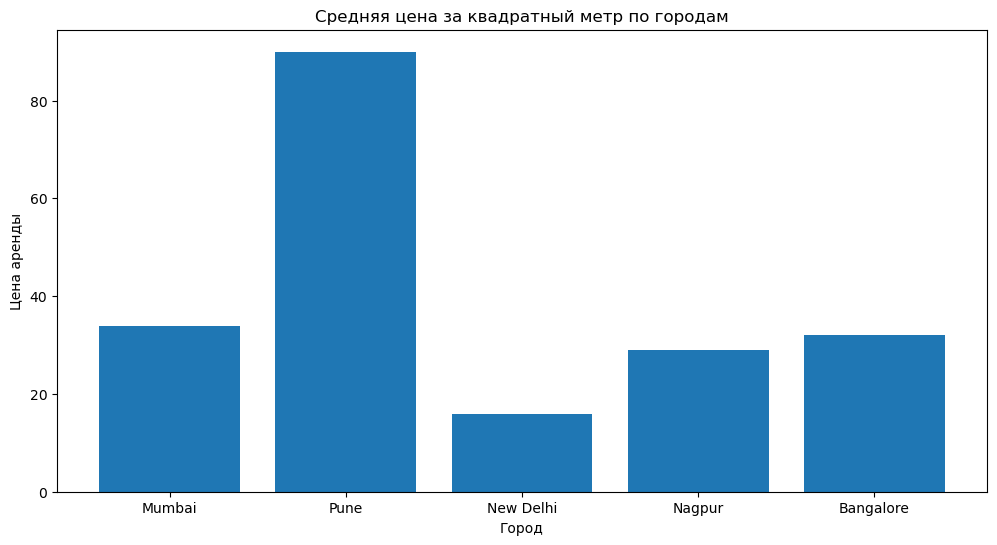

In [15]:
plt.figure(figsize=(12, 6))

city_counts = filtered_df['city'].value_counts()

median_rent_by_city = filtered_df.groupby('city')['area_rate'].median()

plt.bar(city_counts.index, median_rent_by_city)
plt.title('Средняя цена за квадратный метр по городам')
plt.xlabel('Город')
plt.ylabel('Цена аренды')

plt.show()

### Вывод о средней цене за квадратный метр по городам индии

В Pune - самая дорогая стоимость квадратного метра, а самая маленькая в New Delhi.

## Переводим значения в категориальные для матрицы корреляции

In [16]:
def redact_value(value): # Заменяем int на "unknown" в колонке locality 
    try: 
        num = float(value) 
        return 'Unknown'
    except: 
        return value

def redact_balconies_bathroms_furnishing(value): # создаем категориальные признаки для ванн и балконов и ообустройства 
    try: 
        num = int(value)
        return value
    except:
        if value == 'Furnished':
            return 1
        elif value == 'Semi-Furnished':
            return 0.8
        elif value == 'Unfurnished':
            return 0.5

def redact_city(city): # заменяем строки на категориальные переменные 
    try: 
        num = float(city) 
        return 'Unknown'
    except:
        if city == 'Mumbai':
            return 0
        elif city == 'New Delhi':
            return 1
        elif city == 'Pune':
            return 2
        elif city == 'Nagpur':
            return 3
        elif city == 'Bangalore':
            return 4
        else: 
            return 5

df.locality = df.locality.apply(redact_value) # применяем функции для замены int значения на Unknown 
df.city = df.city.apply(redact_city) # применяем функцию для замены строк на категориальные переменные 
df.balconies = df.balconies.apply(redact_balconies_bathroms_furnishing) # применяем функцию для замены строк на категориальные переменные 
df.bathrooms = df.bathrooms.apply(redact_balconies_bathroms_furnishing) # применяем функцию для замены строк на категориальные переменные 
df.furnishing = df.furnishing.apply(redact_balconies_bathroms_furnishing) # применяем функцию для замены строк на категориальные переменные 

In [17]:
list(df.city.unique())


[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

In [18]:
df

,,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
2 BHK Flat for Rent in Oberoi Woods,Goregaon East,Mumbai,Goregaon East,0,897.0,2,2,0,0.8,134.000000,120000.0
1 BHK Flat for Rent in Sapphire Lakeside,Powai,Mumbai,Powai,0,490.0,1,1,0,0.8,82.000000,40000.0
1 BHK Flat for Rent in Unique Star Harsh Vihar,Mira Road Area,Mumbai,Mira Road,0,595.0,1,1,0,0.5,25.000000,15000.0
3 BHK Flat for Rent in Soami Nagar South,Soami Nagar,New Delhi,Soami Nagar South,1,2700.0,3,3,2,0.8,74.111111,200000.0
1 BHK Flat for Rent in Riverdale Suites,Kharadi,Pune,Kharadi,2,495.0,1,1,0,0.5,48.000000,24000.0
...,...,...,...,...,...,...,...,...,...,...,...
4 BHK Flat for Rent in Oberoi Eternia And Enigma,Mulund West,Mumbai,Mulund West,0,1926.0,4,3,0,0.8,75.000000,150000.0
1 BHK Flat for Rent in Link View,IC Colony,Mumbai,IC Colony,0,430.0,1,1,0,0.8,70.000000,30000.0
2 BHK Flat for Rent in Lodha Fiorenza,Goregaon East,Mumbai,Goregaon East,0,870.0,2,2,2,1.0,144.000000,130000.0
2 BHK Flat for Rent in Malpani Vivanta,Balewadi,Pune,Balewadi,2,734.0,2,2,2,0.5,48.000000,35000.0


In [19]:
df_clean = df.replace('Unknown', pd.NA).dropna() # не null 

In [20]:
df_clean = df_clean[['city', 'area', 'beds', 'bathrooms', 'balconies', 'furnishing', 'area_rate', 'rent']]

<Axes: >

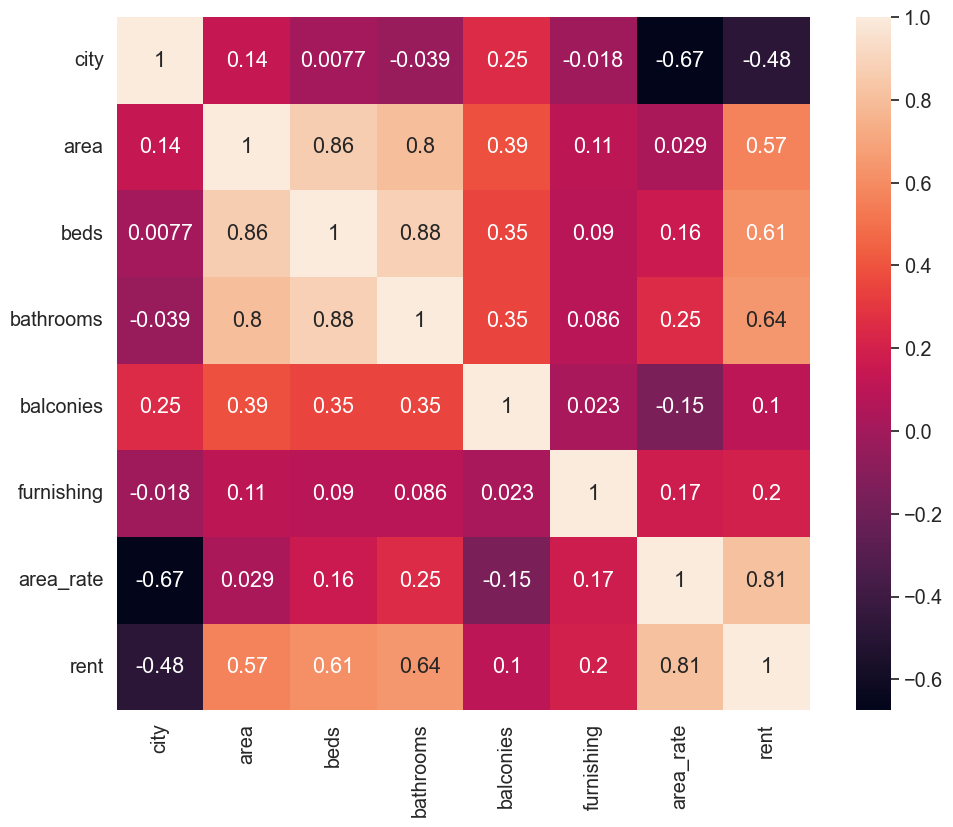

In [34]:
corrmat = df_clean.corr(method='spearman') # Матрица карреляции, использую матрицу spearman, т.к данные не представляют собой нормальное распределение 
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

## Исходя из матрицы можно сделать вывод высокой значимости кореляции некоторых параметров: (высокая значимость - значимость приближенная к 1) 

1. Аренда карелирует с ценой за квадратный метр. (коэффициент корреляции - 0.81)
2. Количество сплаен и ван карелируют с площадью. (коэффициент корреляции - 0.86 и 0.8)
4. Количество спален кареллирует с количеством ванн. (коэффициент корреляции - 0.88)

## Проанлизируем распределение параметров

Text(0.5, 1.0, 'Распределение цены за квадратный метр и площади квартиры')

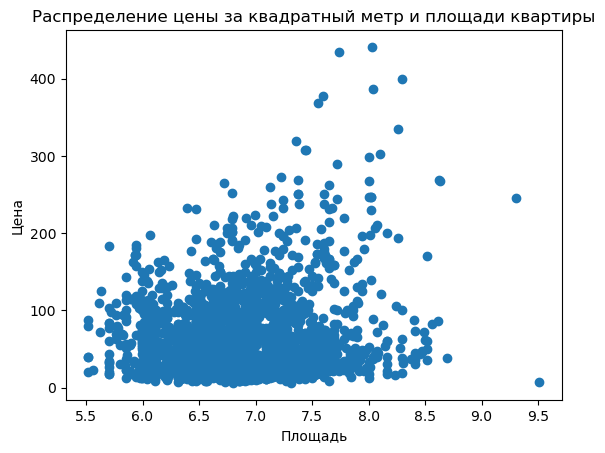

In [70]:
plt.scatter(df_clean['area'], df_clean['area_rate']) # распределение цены по площади
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.title('Распределение цены за квадратный метр и площади квартиры')

### Вывод о распределении цены за кв и площади квартиры

Здесь мы видим, что большинство точек сосредоточено в одном промежутке, что характерно для свободного рынка квартир и нормального распределения

In [35]:
# упрощаем значения
df_clean['rent'] = np.log(df_clean['rent']) 
df_clean['area'] = np.log(df_clean['area']) 

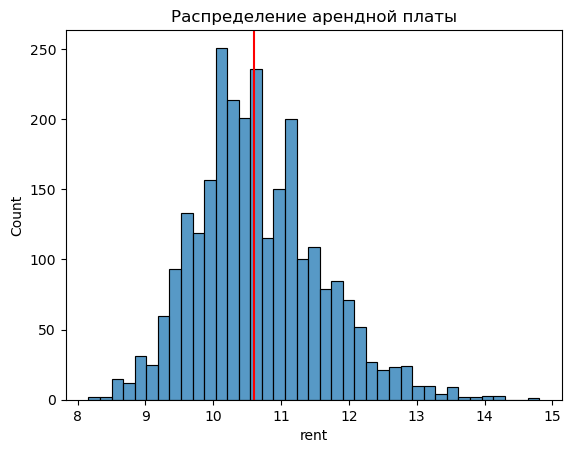

<Figure size 640x480 with 0 Axes>

In [73]:
plt.title('Распределение арендной платы')
sns.histplot(df_clean['rent']) # распределение арендной платы
median_area = df_clean['rent'].median()
plt.axvline(median_area, color='red')
fig = plt.figure()

### Вывод о рааспределение арендной платы: 

Здесь мы видим, что большинство квартир имеют среднюю или около нее арендную оплату

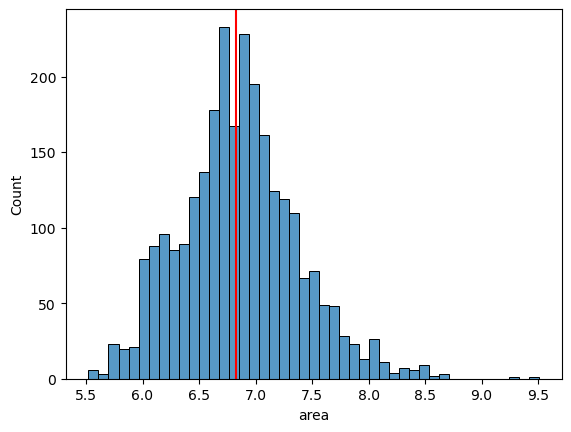

<Figure size 640x480 with 0 Axes>

In [45]:
sns.histplot(df_clean['area']) # распределение площади 
median_area = df_clean['area'].median()
plt.axvline(median_area, color='red')
fig = plt.figure()


### Вывод о распределении арендной платы: 

Также, большинство квартир имеет среднюю площадь, но также наблюдаются отклонения

### Исходя из вышепречисленных графиков, можно увидеть что Mumbai лидируют практически во всем по сравнению с другими городами, поэтому сравним медианные значения показателей квартир в этом городе

### Средняя цена аренда квартиры в Mumbai 

In [84]:
median_rent_Mumbai = df[df['city'] == 'Mumbai']['rent'].median()

print(median_rent_Mumbai)

73000.0


### Средняя цена за 1 квадратный метр в Mumbai 

In [87]:
median_area_rent_Mumbai = df[df['city'] == 'Mumbai']['area_rate'].median()

print(median_area_rent_Mumbai)

90.0


### Средняя площадь квартиры в Mumbai

In [88]:
median_area_Mumbai = df[df['city'] == 'Mumbai']['area'].median()

print(median_area_Mumbai)

842.0


### Количество квартир в Mumbai 

In [89]:
count_flats_Mumbai = df[df['city'] == 'Mumbai']['area'].count()

print(count_flats_Mumbai)

1034


## Статистический вывод. В приведенных в датасете городах (Mumbai, Pune, New Delhi, Nagpur, Bangalore), мы заметили некоторые закономерности и сейчас мы уже можем описать наши города: 

1) В Mumbai больше всего квартир за этим городом уже следуют по порядку Pune, New Dephi, Nagpur, Bangalore.
2) В Pune самая дорогая медианная цена квартир за ним уже следуют по порядку Mumbai, Nagpur, Bangalore, New Delhi.
3) Аренда квартиры зависит от стоимости квадратного метра жилья.
4) Чем больше площадь недвежимости, тем больше спален и ванн в этой недвижимости.
5) Чем больше ванн в квартире, тем больше кроватей.
6) Большинство квартир в трех городах имеют арендную плату и площадь квартиры (моду) достаточно сильно приблеженную к медиане.

## Ответ на вопрос: "В каком городе лучше покупать квартиру?": 

Самым лучшим вариентом из всех представленных городов является Mumbai: 

- Средняя цена аренды квартиры - 73к рупии
- Средняя цена за 1 квадратный метр - 90к рупий
- Средняя площадь квартиры в Mumbai - 1034 кв. фунта
- Количество квартир в Mumbai - 1034